##**TOURISM PLACE RECOMMENDATION SYSTEM USING HYBRID FILTERING** 

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import math

from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Load Data

In [ ]:
#connect ke gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset
tourism = pd.read_csv('/content/drive/MyDrive/KULIAH/TA-2/SIDANG/TASI-107/DATA/107-raw_data.csv')
tourism.sample(3)

,placeId,destination_name,category_name,address,Kecamatan,postal_code,state,place_rating,lat,lng,...,two Star,three Star,four Star,five Star,reviewerId,name,text,publishAt,publishedAtDate,user_rating
3670,55,Wisata BUKIT GIBEON SIBISA PARAPAT,wisata alam & wisata religi,"Unnamed Road, Kabupaten Toba Samosir, 21174, S...",Lumban Julu,22386.0,NaN,4.4,25.908.281,989.978.528,...,NaN,NaN,NaN,NaN,3180,Sony Tambunan,NaN,2 tahun lalu,2019-04-23T04:24:01.169Z,5
8927,59,Museum Batak Tb Silalahi Center,wisata sejarah,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",Balige,22312.0,NaN,4.5,23.332.045,990.484.168,...,NaN,NaN,NaN,NaN,2248,Christofel Wowor,NaN,3 tahun lalu,2018-02-05T04:22:23.505Z,5
4237,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,3663,Dadap Hutajulu,Asik aja..,3 tahun lalu,2018-06-18T13:10:58.281Z,4


In [ ]:
#Data info
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   placeId           10649 non-null  int64  
 1   destination_name  10649 non-null  object 
 2   category_name     10649 non-null  object 
 3   address           10649 non-null  object 
 4   Kecamatan         10649 non-null  object 
 5   postal_code       10557 non-null  float64
 6   state             63 non-null     object 
 7   place_rating      10649 non-null  float64
 8   lat               10649 non-null  object 
 9   lng               10649 non-null  object 
 10  reviews_count     64 non-null     float64
 11  one Star          63 non-null     float64
 12  two Star          63 non-null     float64
 13  three Star        63 non-null     float64
 14  four Star         63 non-null     float64
 15  five Star         63 non-null     float64
 16  reviewerId        10649 non-null  int64 

In [ ]:
#Drop unused data
tourism.drop(['postal_code','state','reviews_count', 'one Star', 'one Star', 'two Star','three Star','four Star','five Star', 'publishAt'], axis = 1, inplace=True)

In [ ]:
#Drop unused data
tourism=tourism[['reviewerId','placeId','destination_name', 'category_name', 'text','user_rating']]
tourism

,reviewerId,placeId,destination_name,category_name,text,user_rating
0,0,1,Agrowisata Batulamak,wisata pertanian,"Yuks mari petik sendiri ,",5
1,1,1,Agrowisata Batulamak,wisata pertanian,"Suka bgt tempat ini, asri bgt, asik ,bisa meti...",5
2,2,1,Agrowisata Batulamak,wisata pertanian,👍,5
3,3,1,Agrowisata Batulamak,wisata pertanian,NaN,5
4,4,2,Gunung Pangulubao,wisata alam,NaN,5
...,...,...,...,...,...,...
10644,8747,65,Air Terjun Sampuran Harimau,wisata alam,Flyingfox Siharimo Waterfall menguji nyali dan...,5
10645,2679,65,Air Terjun Sampuran Harimau,wisata alam,(Diterjemahkan oleh Google) Tempat yang bagus\...,4
10646,8748,65,Air Terjun Sampuran Harimau,wisata alam,Wow.. mengagumkan.. landscape alam yg indah,4
10647,8749,65,Air Terjun Sampuran Harimau,wisata alam,(Diterjemahkan oleh Google) Ulin dahutakkon Ah...,4


In [ ]:
#Drop unused data
tourism=tourism[['reviewerId','placeId','destination_name', 'category_name', 'decription','text','user_rating']]
tourism

KeyError: ignored

In [ ]:
#Computes a summary of statistics pertaining to the DataFrame columns.
tourism.describe().T

,reviewerId,placeId,user_rating
count,10649.000000,10649.000000,10649.000000
mean,3959.584374,50.938586,4.410837
std,2572.977696,12.991053,0.996594
min,0.000000,1.000000,1.000000
25%,1628.000000,48.000000,4.000000
50%,3780.000000,57.000000,5.000000
75%,6150.000000,59.000000,5.000000
max,8749.000000,65.000000,5.000000


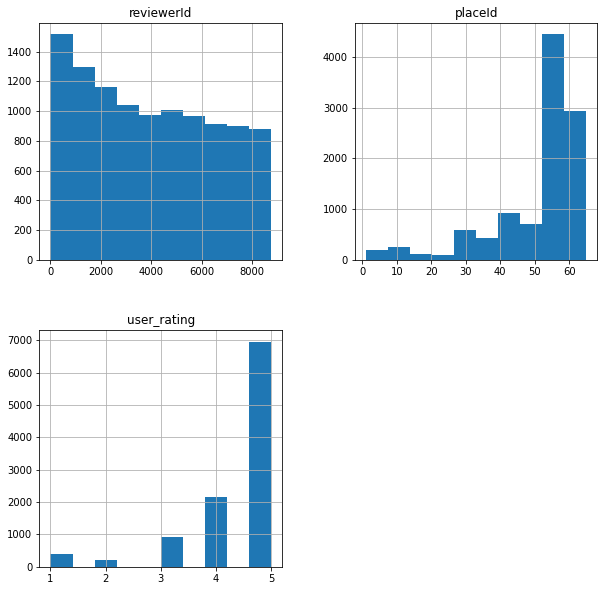

In [ ]:
# Histogram visualization

import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Distribution of variables in Rating with histogram plot
tourism.hist(figsize=(10, 10))
plt.show()

In [ ]:
#returns the shape of an array.
tourism.shape

(10649, 6)

In [ ]:
# Check unique values in data
tourism.nunique()

reviewerId          8750
placeId               65
destination_name      65
category_name          9
text                4929
user_rating            5
dtype: int64

##  Data Preparation
Setelah data diperiksa dan dikarakterisasi data tersebut 
kemudian disiapkan untuk tahapan berikutnya.

In [ ]:
#Missing value check
tourism.isna()

,reviewerId,placeId,destination_name,category_name,text,user_rating
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
10644,False,False,False,False,False,False
10645,False,False,False,False,False,False
10646,False,False,False,False,False,False
10647,False,False,False,False,False,False


In [ ]:
#Sum missing value check
tourism.isna().sum()

reviewerId             0
placeId                0
destination_name       0
category_name          0
text                4982
user_rating            0
dtype: int64

In [ ]:
#load dataset
deskripsi = pd.read_csv('/content/drive/MyDrive/KULIAH/TA-2/SIDANG/TASI-107/DATA/deskripsi.csv')
deskripsi.sample(3)

,placeId,description
32,33,Bukit Singgolom merupakan salah satu bukit fav...
46,47,taman eden 100 merupakan tempat wisata alam ya...
49,50,Siregar Aek Nalas merupakan desa di wilayah ke...


In [ ]:
#merge dataset with data description
dataset=tourism.merge(deskripsi, on="placeId")
dataset.sample(3)

,reviewerId,placeId,destination_name,category_name,text,user_rating,description
741,713,31,Pakkodian Toba,wisata bahari,"View yg luar biasa, rasa nyaman ketika menikma...",4,Selanjutnya melangkah ke pantai pakkodian yang...
2068,1865,42,Taman Eden 100,wisata alam,NaN,3,Taman eden 100 merupakan objek wisata rimba di...
993,935,31,Pakkodian Toba,wisata bahari,NaN,5,Selanjutnya melangkah ke pantai pakkodian yang...


In [ ]:
dataset['text'].fillna('.', inplace = True)


In [ ]:
#Form a new column that combines categories, descriptions and reviews of tourist attractions
dataset = dataset[['reviewerId','placeId', 'destination_name','description', 'category_name','text', 'user_rating']]
dataset['overview'] = dataset['category_name'].map(str) + " , " + dataset['description']+ " , " + dataset['text']
dataset = dataset[['reviewerId','placeId', 'destination_name','description', 'category_name','text', 'user_rating', 'overview']]
dataset.sample(3)

,reviewerId,placeId,destination_name,description,category_name,text,user_rating,overview
6103,2411,57,Pantai Lumban Bul-bul Balige,Tempat wisata di Toba Samosir yang kedua adala...,wisata bahari,.,5,"wisata bahari , Tempat wisata di Toba Samosir ..."
2060,1857,42,Taman Eden 100,Taman eden 100 merupakan objek wisata rimba di...,wisata alam,.,5,"wisata alam , Taman eden 100 merupakan objek w..."
574,563,21,Air Terjun Siboruon,Air terjun ini sangat indah dan asri. Pemandan...,wisata alam,.,5,"wisata alam , Air terjun ini sangat indah dan ..."


In [ ]:
#Sum missing value check
dataset.isna().sum()

reviewerId          0
placeId             0
destination_name    0
description         0
category_name       0
text                0
publishedAtDate     0
user_rating         0
overview            0
dtype: int64

In [ ]:
#Checking the attribute has been dropped if there is duplicate data
#Checking unique attributes
dataset.nunique()

reviewerId           8750
placeId                65
destination_name       65
description            60
category_name           9
text                 4930
publishedAtDate     10649
user_rating             5
overview             5387
dtype: int64

#TEXT PREPROCESSING

In [ ]:
!pip install preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
import re, string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import preprocessor as p
#from contractions import contractions_dict
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('indonesian')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of stop words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [ ]:
def normalize_and_lemmaize(input):
    sample = remove_special_characters(input)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
dataset['overview'] = dataset['overview'].map(lambda text: normalize_and_lemmaize(text))

In [ ]:
dataset.head()

,reviewerId,placeId,destination_name,description,category_name,text,publishedAtDate,user_rating,overview
0,0,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,"Yuks mari petik sendiri ,",2020-11-01T11:12:16.322Z,5,wisata pertanian perkebunan dusun batu lamakde...
1,1,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,"Suka bgt tempat ini, asri bgt, asik ,bisa meti...",2020-10-30T23:03:23.379Z,5,wisata pertanian perkebunan dusun batu lamakde...
2,2,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,👍,2021-01-22T19:37:46.089Z,5,wisata pertanian perkebunan dusun batu lamakde...
3,3,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,.,2020-11-01T10:10:57.174Z,5,wisata pertanian perkebunan dusun batu lamakde...
4,4,2,Gunung Pangulubao,Objek wisata ini cocok sekali buat anda yang m...,wisata alam,.,2021-01-29T02:39:42.738Z,5,wisata alam objek wisata cocok menyukai pendak...


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 24.2 MB/s 


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

dataset['overview'] = dataset['overview'].apply(stemm_text) 
dataset

,reviewerId,placeId,destination_name,description,category_name,text,publishedAtDate,user_rating,overview
0,0,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,"Yuks mari petik sendiri ,",2020-11-01T11:12:16.322Z,5,wisata tani kebun dusun batu lamakdesa gurgur ...
1,1,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,"Suka bgt tempat ini, asri bgt, asik ,bisa meti...",2020-10-30T23:03:23.379Z,5,wisata tani kebun dusun batu lamakdesa gurgur ...
2,2,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,👍,2021-01-22T19:37:46.089Z,5,wisata tani kebun dusun batu lamakdesa gurgur ...
3,3,1,Agrowisata Batulamak,perkebunan ini berada di Dusun Batu Lamak-Desa...,wisata pertanian,.,2020-11-01T10:10:57.174Z,5,wisata tani kebun dusun batu lamakdesa gurgur ...
4,4,2,Gunung Pangulubao,Objek wisata ini cocok sekali buat anda yang m...,wisata alam,.,2021-01-29T02:39:42.738Z,5,wisata alam objek wisata cocok suka daki rute ...
...,...,...,...,...,...,...,...,...,...
10644,8747,65,Air Terjun Sampuran Harimau,"Dengan ketinggian lebih dari 200 meter, Sampur...",wisata alam,Flyingfox Siharimo Waterfall menguji nyali dan...,2017-07-13T09:24:28.171Z,5,wisata alam tinggi meter sampur harimau bahasa...
10645,2679,65,Air Terjun Sampuran Harimau,"Dengan ketinggian lebih dari 200 meter, Sampur...",wisata alam,(Diterjemahkan oleh Google) Tempat yang bagus\...,2017-01-13T23:29:15.478Z,4,wisata alam tinggi meter sampur harimau bahasa...
10646,8748,65,Air Terjun Sampuran Harimau,"Dengan ketinggian lebih dari 200 meter, Sampur...",wisata alam,Wow.. mengagumkan.. landscape alam yg indah,2016-12-07T02:35:06.003Z,4,wisata alam tinggi meter sampur harimau bahasa...
10647,8749,65,Air Terjun Sampuran Harimau,"Dengan ketinggian lebih dari 200 meter, Sampur...",wisata alam,(Diterjemahkan oleh Google) Ulin dahutakkon Ah...,2016-04-18T01:12:29.889Z,4,wisata alam tinggi meter sampur harimau bahasa...


In [ ]:
dataset.to_csv('./Data_Preprocessing.csv')